# Who likes to go to shopping centres?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('data/responses.csv')

music = df.iloc[:,1:19]
movies = df.iloc[:,19:31]
interests = df.iloc[:,31:46]
hobbies = df.iloc[:,46:63]
phobias = df.iloc[:,63:73]
health = df.iloc[:,73:76]
traits = df.iloc[:,76:133]
spending = df.iloc[:,133:140]
demographics = df.iloc[:,140:150]

feature = interests.join([music.iloc[:,0],movies.iloc[:,0],hobbies,phobias,health.iloc[:,-1]])

# Owing to using machine learning, I used fillna method instead of dropping the missing data.  
feature.fillna(feature.mean(),inplace=True).head()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,4.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,3.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,3.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,3.0,5.0,5,5.0,4.0,5.0,5.0,3.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0,4.0


## EDA

C:\Users\Weizen\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


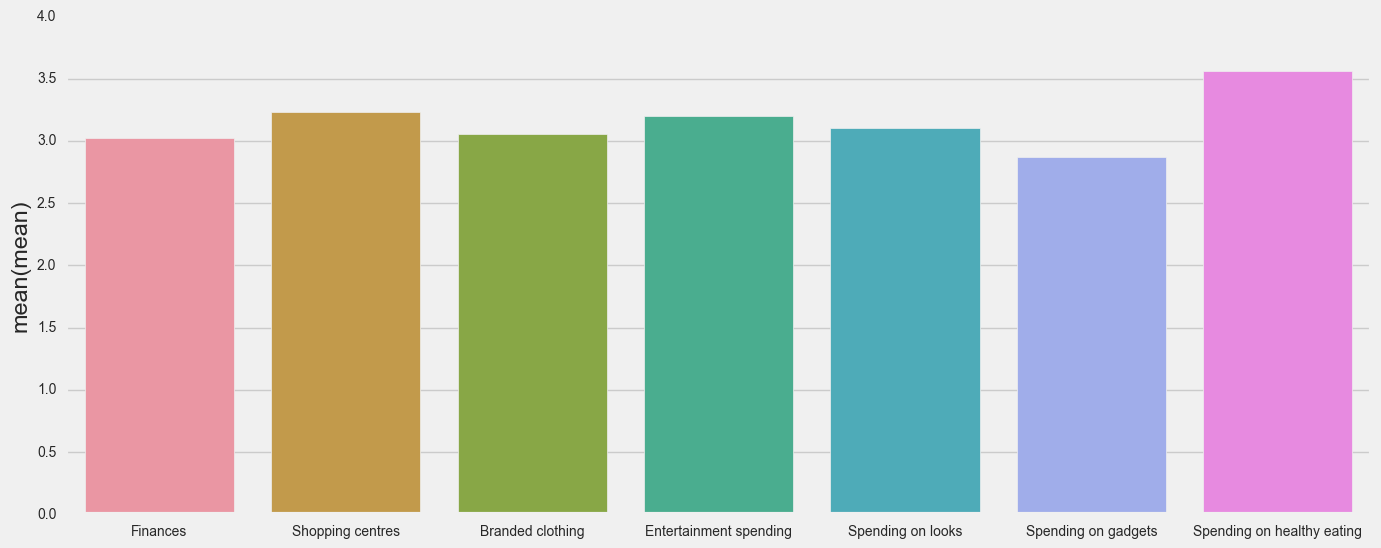

In [4]:
plt.figure(figsize=(15,6))
sns.barplot(x = spending.describe().columns, y=spending.describe().loc['mean'])

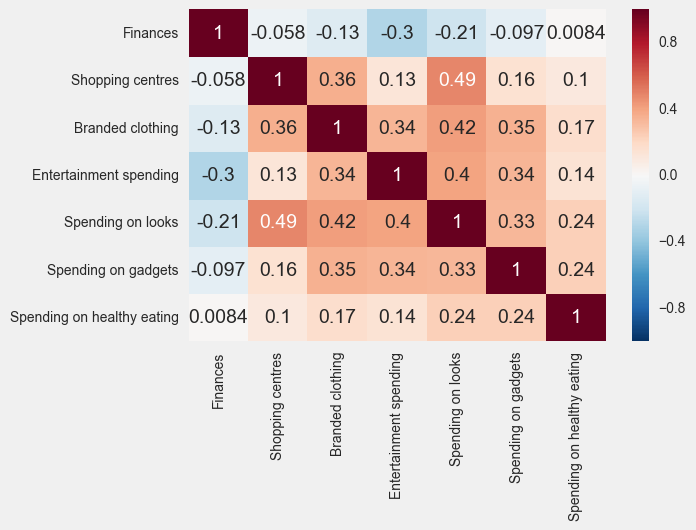

In [5]:
sns.heatmap(spending.corr(),annot=True)

**Nominal data for all.**

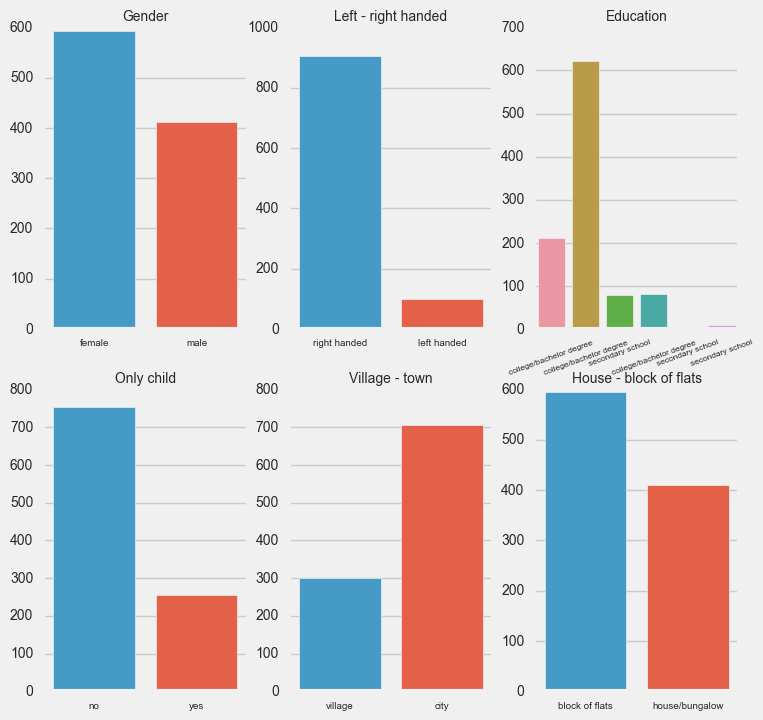

In [6]:
demo1 = ['Gender','Left - right handed','Education','Only child','Village - town','House - block of flats']

dic = dict()
for a,b in enumerate(demo1):
    dic[a] = b

fig, axes = plt.subplots(2,3,figsize=(8,8))
num = 0
for i in range(2):
    for j in range(3):
        sns.countplot(demographics[dic[num]],ax = axes[i,j])
        axes[i,j].set_title(dic[num],fontsize=10)
        axes[i,j].set_xlabel('')
        axes[i,j].set_ylabel('')
        axes[i,j].set_xticklabels(labels=demographics[dic[num]].unique(), fontsize=7)
        num+=1
        
axes[0,2].set_xticklabels(labels=demographics['Education'],rotation=20, fontsize=6)


**Numerical data for all.**

In [7]:
demo2 = ['Age','Height','Weight','Number of siblings']

demographics[demo2].dropna().describe()

,Age,Height,Weight,Number of siblings
count,978.000000,978.00000,978.000000,978.000000
mean,20.437628,173.52863,66.351738,1.294479
std,2.844070,10.04390,13.513669,1.018353
min,15.000000,62.00000,41.000000,0.000000
25%,19.000000,167.00000,55.000000,1.000000
50%,20.000000,173.00000,64.000000,1.000000
75%,22.000000,180.00000,75.000000,2.000000
max,30.000000,203.00000,150.000000,10.000000


## Shopping Center Lovers

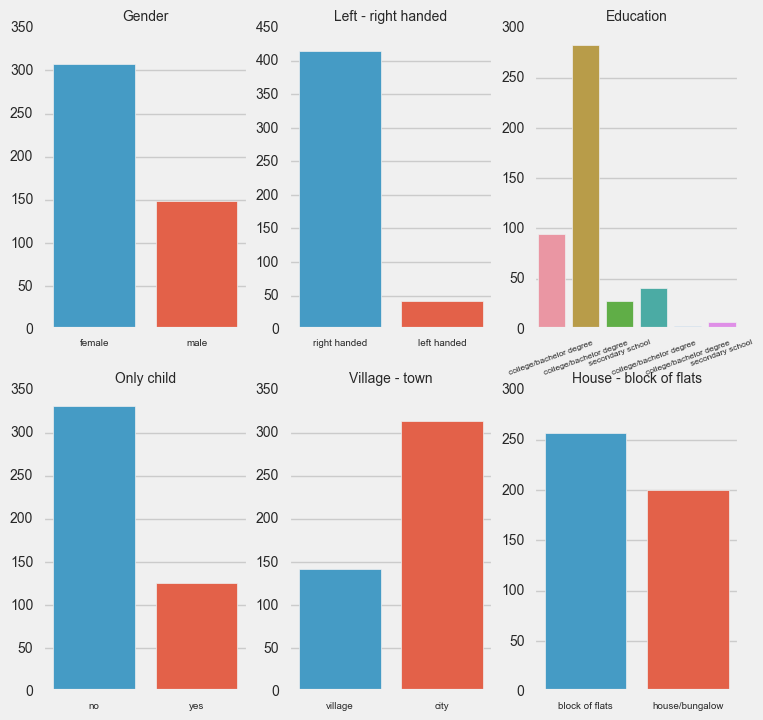

In [8]:
shopping_center_lover = demographics[spending['Shopping centres']>=4]
dic = dict()
for a,b in enumerate(demo1):
    dic[a] = b

fig, axes = plt.subplots(2,3,figsize=(8,8))
num = 0
for i in range(2):
    for j in range(3):
        sns.countplot(shopping_center_lover[dic[num]],ax = axes[i,j])
        axes[i,j].set_title(dic[num],fontsize=10)
        axes[i,j].set_xlabel('')
        axes[i,j].set_ylabel('')
        axes[i,j].set_xticklabels(labels=shopping_center_lover[dic[num]].unique(), fontsize=7)
        num+=1
        
axes[0,2].set_xticklabels(labels=shopping_center_lover['Education'],rotation=20, fontsize=6)

In [9]:
demographics[spending['Shopping centres']>=4][demo2].dropna().describe()

,Age,Height,Weight,Number of siblings
count,447.000000,447.000000,447.000000,447.000000
mean,20.136465,172.129754,64.165548,1.248322
std,2.804815,10.378107,12.927337,0.958133
min,15.000000,62.000000,41.000000,0.000000
25%,18.000000,166.000000,55.000000,1.000000
50%,20.000000,171.000000,62.000000,1.000000
75%,21.000000,178.000000,72.000000,2.000000
max,30.000000,197.000000,125.000000,6.000000


## Playing with model

**First, I try to predict shopping centres variable in 5 degrees, but the accuracy is not good.
So, I transfer variable to binary. If you have better algorithm or good idea please let me know.**

In [10]:
## Get Dummies
smoking = pd.get_dummies(health['Smoking'],drop_first=True)
alcohol = pd.get_dummies(health['Alcohol'],drop_first=True)
gender  = pd.get_dummies(demographics['Gender'],drop_first=True)
handed  = pd.get_dummies(demographics['Left - right handed'],drop_first=True)
child   = pd.get_dummies(demographics['Only child'],drop_first=True)
vil_tow = pd.get_dummies(demographics['Village - town'],drop_first=True)
resid   = pd.get_dummies(demographics['House - block of flats'],drop_first=True)
edu   = pd.get_dummies(demographics['Education'],drop_first=True)

features = feature.join([smoking,alcohol,gender,handed,child,vil_tow,resid,edu])
features.fillna(feature.mean(),inplace=True).head()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,male,right handed,yes,village,house/bungalow,currently a primary school pupil,doctorate degree,masters degree,primary school,secondary school
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
spending.fillna(spending.mean(),inplace=True)

X = features
y = spending['Shopping centres'].apply(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### SVC

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
svc = SVC(C=1,kernel='rbf')
svc.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = svc.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[ 6 14 14  2  3]
 [ 5 20 20 10  1]
 [ 3 14 27 17 11]
 [ 0  6 24 18 20]
 [ 1  0 11 23 33]]
             precision    recall  f1-score   support

          1       0.40      0.15      0.22        39
          2       0.37      0.36      0.36        56
          3       0.28      0.38      0.32        72
          4       0.26      0.26      0.26        68
          5       0.49      0.49      0.49        68

avg / total       0.35      0.34      0.34       303



## GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import KFold

kf = KFold(len(X_train), n_folds=5)
param_grid = {'C': [.01,.03,.1,.3,1,3,10,100]} 
grid = GridSearchCV(SVC(),param_grid,verbose=3,cv=kf)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.01 ..........................................................


C:\Users\Weizen\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=0.01, score=0.204225, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................... C=0.01, score=0.211268, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................... C=0.01, score=0.212766, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................... C=0.01, score=0.290780, total=   0.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........................... C=0.01, score=0.191489, total=   0.0s
[CV] C=0.03 ..........................................................
[CV] ........................... C=0.03, score=0.204225, total=   0.0s
[CV] C=0.03 ..........................................................
[CV] ........................... C=0.03, score=0.211268, total=   0.0s
[CV] C=0.03 ..........................................................
[CV] ........................... C=0.03, score=0.212766, total=   0.0s
[CV] C=0.03 ..........................................................
[CV] ........................... C=0.03, score=0.290780, total=   0.0s
[CV] C=0.03 ..........................................................
[CV] ........................... C=0.03, score=0.191489, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................ C=0.1, score=0.204225, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.0s finished


GridSearchCV(cv=sklearn.cross_validation.KFold(n=707, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [16]:
grid.best_params_

{'C': 1}

In [17]:
grid.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
grid_predictions = grid.predict(X_test)

In [19]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 6 14 14  2  3]
 [ 5 20 20 10  1]
 [ 3 14 27 17 11]
 [ 0  6 24 18 20]
 [ 1  0 11 23 33]]


             precision    recall  f1-score   support

          1       0.40      0.15      0.22        39
          2       0.37      0.36      0.36        56
          3       0.28      0.38      0.32        72
          4       0.26      0.26      0.26        68
          5       0.49      0.49      0.49        68

avg / total       0.35      0.34      0.34       303



## Random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [21]:
rfc_pred = rfc.predict(X_test)

In [22]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[11  5 17  4  2]
 [ 6 20 21  7  2]
 [ 4 10 33 15 10]
 [ 0  5 17 26 20]
 [ 1  1 10 18 38]]
             precision    recall  f1-score   support

          1       0.50      0.28      0.36        39
          2       0.49      0.36      0.41        56
          3       0.34      0.46      0.39        72
          4       0.37      0.38      0.38        68
          5       0.53      0.56      0.54        68

avg / total       0.44      0.42      0.42       303



## KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [25]:
pred = knn.predict(X_test)

In [26]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 4 16 16  3  0]
 [11 18 17  9  1]
 [ 8 16 34 10  4]
 [ 4 16 26 19  3]
 [ 5 11 27 16  9]]
             precision    recall  f1-score   support

          1       0.12      0.10      0.11        39
          2       0.23      0.32      0.27        56
          3       0.28      0.47      0.35        72
          4       0.33      0.28      0.30        68
          5       0.53      0.13      0.21        68

avg / total       0.32      0.28      0.26       303



## Binary method

In [27]:
spending.loc[spending['Shopping centres'] <= 3,'Shopping centres'] = 0
spending.loc[spending['Shopping centres'] > 3,'Shopping centres'] = 1
spending.head()

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
0,3.0,1.0,5.0,3.0,3.0,1,3.0
1,3.0,1.0,1.0,4.0,2.0,5,2.0
2,2.0,1.0,1.0,4.0,3.0,4,2.0
3,2.0,1.0,3.0,3.0,4.0,4,1.0
4,4.0,0.0,4.0,3.0,3.0,2,4.0


In [28]:
spending.fillna(spending.mean(),inplace=True)

X = features
y = spending['Shopping centres'].apply(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## SVC for binary

In [29]:
svc = SVC(C=1,kernel='rbf')
svc.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
predictions = svc.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[138  27]
 [ 33 105]]
             precision    recall  f1-score   support

          0       0.81      0.84      0.82       165
          1       0.80      0.76      0.78       138

avg / total       0.80      0.80      0.80       303



## Random Forest for binary

In [31]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [32]:
rfc_pred = rfc.predict(X_test)

In [46]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[145  20]
 [ 32 106]]
             precision    recall  f1-score   support

          0       0.82      0.88      0.85       165
          1       0.84      0.77      0.80       138

avg / total       0.83      0.83      0.83       303



## PCA for binary

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
scaled_data = scaler.transform(X)

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=2)

In [77]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [78]:
x_pca = pca.transform(scaled_data)

In [79]:
x_pca

array([[ 0.31790246,  1.44728088],
       [ 2.59877433, -1.34436466],
       [ 0.15033029,  2.41126845],
       ..., 
       [ 1.40218346, -3.19774361],
       [-2.97446367,  0.7053117 ],
       [ 0.47493396, -0.08321176]])

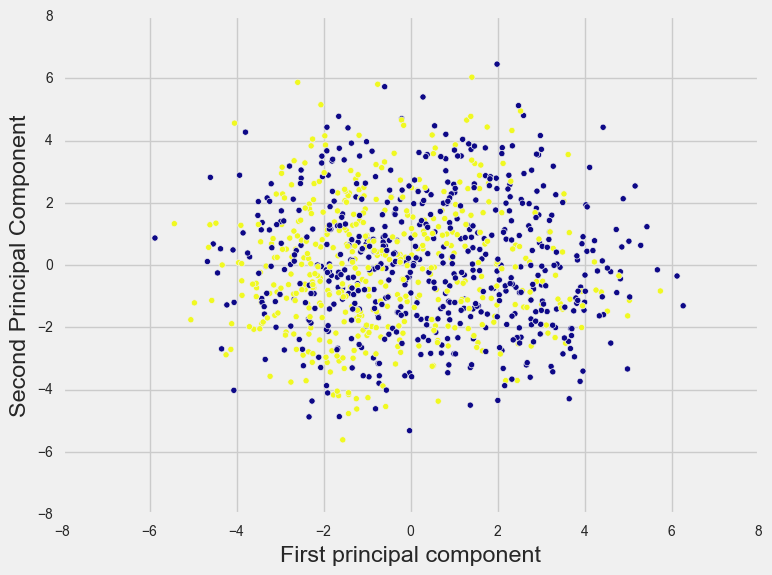

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=spending['Shopping centres'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [81]:
pca.components_

array([[ 0.00908583, -0.09594434,  0.06623188,  0.1267852 ,  0.16019763,
         0.08830304,  0.21260566,  0.05181368, -0.11182896, -0.04195741,
        -0.20204399,  0.02167859, -0.12087521, -0.09884141, -0.01067068,
         0.05853552, -0.02369663,  0.19512919, -0.17011573, -0.0689428 ,
        -0.080487  , -0.1916054 , -0.06754062, -0.11783498,  0.0634944 ,
         0.07247519, -0.12078516, -0.16935654, -0.22159773,  0.1585977 ,
        -0.20105802, -0.01904146,  0.11338748, -0.0882771 , -0.13724429,
        -0.24503298, -0.2448192 , -0.1194132 , -0.2174226 , -0.21175195,
        -0.2248141 , -0.14224098, -0.19800663, -0.09554064, -0.05847897,
        -0.02038204,  0.01337744, -0.00887826,  0.00542539, -0.06666438,
         0.32344031, -0.03091107, -0.01328825, -0.04213579, -0.04638509,
        -0.01479103,  0.00224167, -0.01854219, -0.00418577,  0.00954969],
       [ 0.20646485,  0.19631957,  0.17094047,  0.16215867,  0.22598556,
         0.00836694,  0.08190554,  0.0375301 ,  0.

In [82]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

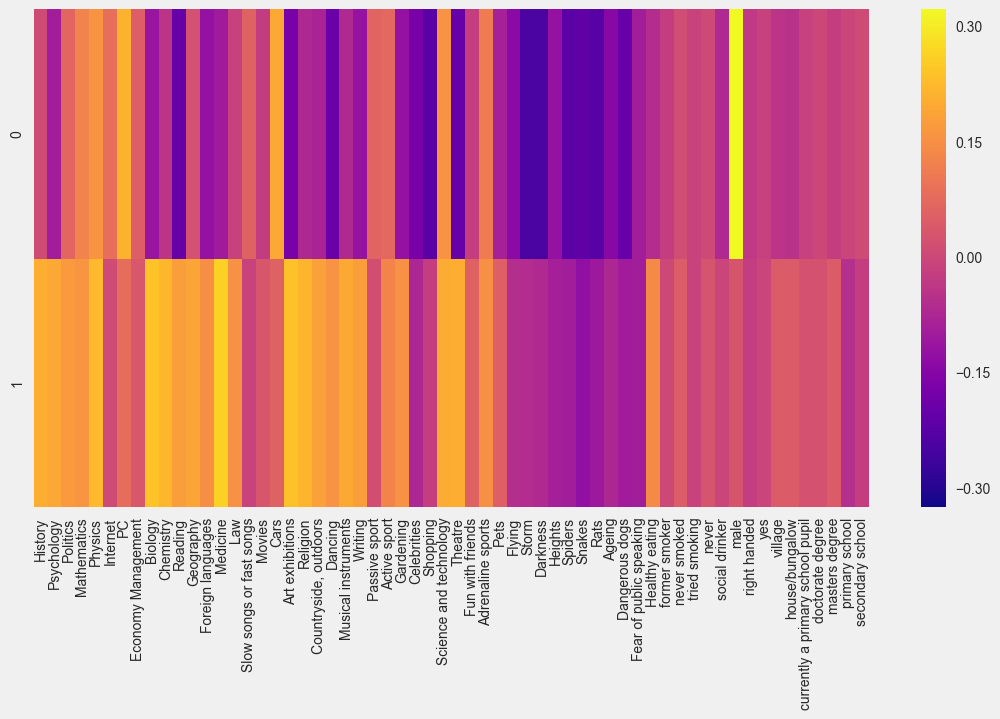

In [83]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

## XGB

In [34]:
from xgboost import XGBClassifier
import xgboost as xgb

clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

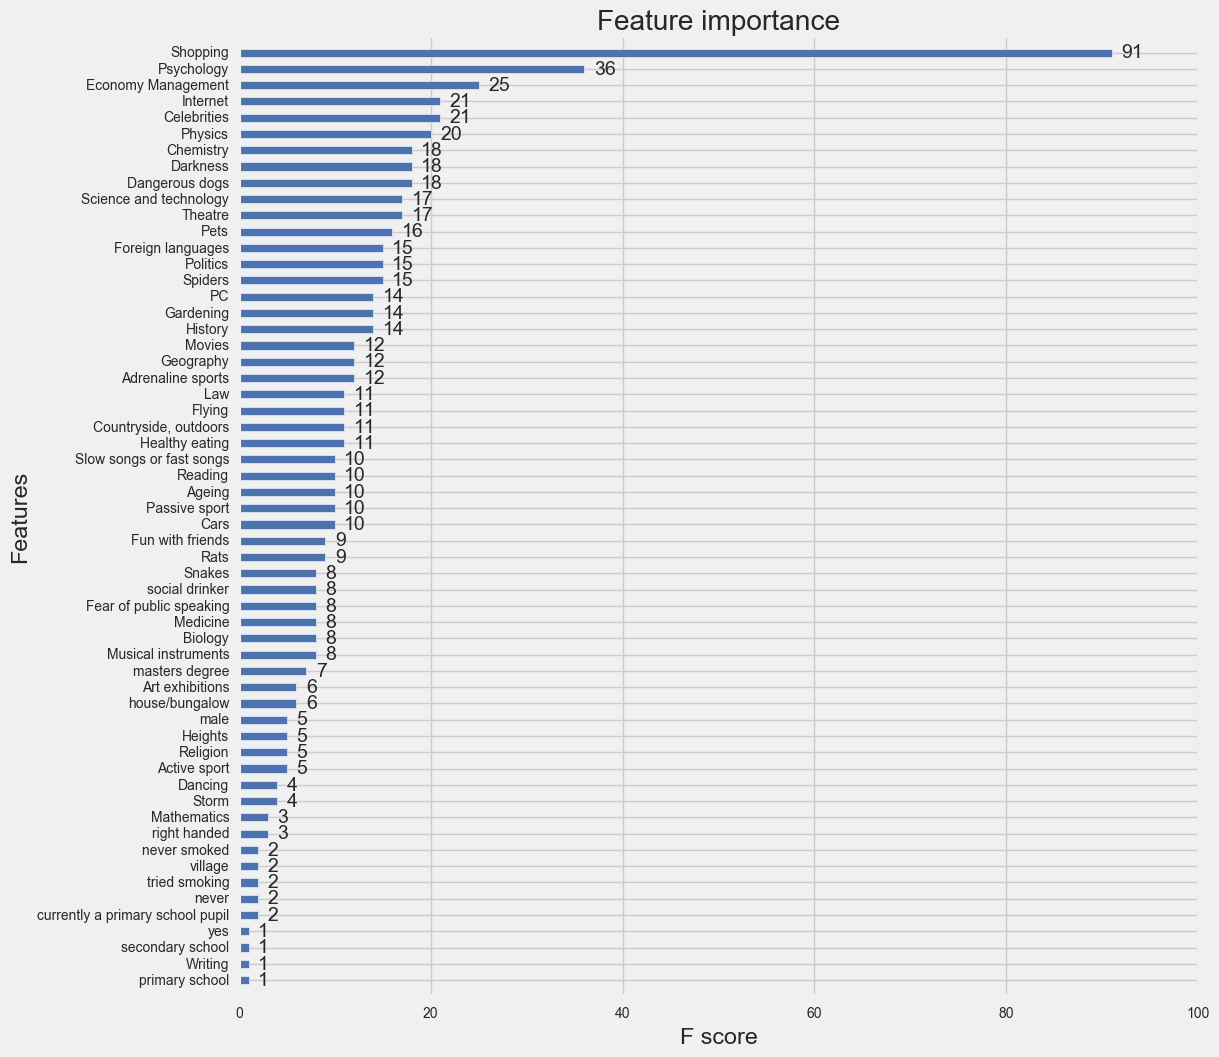

In [35]:
fig = plt.figure(figsize=(12,12))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
xgb.plot_importance(clf,height=0.5,ax=axes)

In [36]:
y_pred = clf.predict(X_test)

In [37]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[137  28]
 [ 36 102]]
             precision    recall  f1-score   support

          0       0.79      0.83      0.81       165
          1       0.78      0.74      0.76       138

avg / total       0.79      0.79      0.79       303



## Selecting feature from model

In [43]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [45]:
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(clf.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(clf, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 78.88%
Thresh=0.000, n=60, Accuracy: 78.88%
Thresh=0.000, n=60, Accuracy: 78.88%
Thresh=0.001, n=58, Accuracy: 78.88%
Thresh=0.001, n=58, Accuracy: 78.88%
Thresh=0.001, n=58, Accuracy: 78.88%
Thresh=0.001, n=58, Accuracy: 78.88%
Thresh=0.003, n=54, Accuracy: 79.21%
Thresh=0.003, n=54, Accuracy: 79.21%
Thresh=0.003, n=54, Accuracy: 79.21%
Thresh=0.003, n=54, Accuracy: 79.21%
Thresh=0.003, n=54, Accuracy: 79.21%
Thresh=0.004, n=49, Accuracy: 80.20%
Thresh=0.004, n=49, Accuracy: 80.20%
Thresh=0.006, n=47, Accuracy: 78.55%
Thresh=0.006, n=47, Accuracy: 78.55%
Thresh=0.007, n=45, Accuracy: 78.55%
Thresh=0.007, n=45, Accuracy: 78.55%
Thresh=0.007, n=45, Accuracy: 78.55%
Thresh=0.007, n=45, Accuracy: 78.55%
Thresh=0.009, n=41, Accuracy: 80.53%
Thresh=0.009, n=41, Accuracy: 80.53%
Thresh=0.010, n=39, Accuracy: 79.54%
Thresh=0.012, n=38, Accuracy: 79.87%
Thresh=0.012, n=38, Accuracy: 79.87%
Thresh=0.012, n=38, Accuracy: 79.87%
Thresh=0.012, n=38, Accuracy: 79.87%
Thresh=0.012, n=38, A